# Predicting the Species of Iris Flowers using basics of Neural Networks

## Objective

Use of Python and Sklearn to apply neural network theory, backpropagation and splitting data techniques to predict the species of iris flowers.

## Data Set

The data set contains Iris flower dataset, including flower sepal length, sepal width, petal length, petal width and species that can be downloaded from [here](https://en.wikipedia.org/wiki/Iris_flower_data_set#Data_set)

The data set contains with the following features:

    •	sepal_length - Continuous variable measured in centimeters.
    •	sepal_width - Continuous variable measured in centimeters.
    •	petal_length - Continuous variable measured in centimeters.
    •	petal_width - Continuous variable measured in centimeters.
    •	species - Categorical. 2 species of iris flowers, Iris-virginica or Iris-versicolor.

## Reading In the Data

In [1]:
import pandas as pd

iris = pd.read_csv("C:/Users/i7/csv/iris.csv")
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
iris.shape

(150, 5)

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Neuron

These models are built by using a series of activation units, known as neurons, to make predictions of some outcome. Neurons take in some input, apply a transformation function, and return an output.

Use the popular sigmoid (logistic) activation function because it returns values between 0 and 1 and can be treated as probabilities.

Create function called sigmoid_activation with inputs x a feature vector and theta a parameter vector of the same length to implement the sigmoid activation function

In [5]:
import numpy as np

z = np.asarray([[9, 5, 4]])
y = np.asarray([[-1, 2, 4]])

# np.dot is used for matrix multiplication.
# z is 1x3 and y is 1x3,  z * y.T is then 3x3.
print("np.dot(z,y.T):", np.dot(z,y.T))

# Variables to test sigmoid_activation.
iris["ones"] = np.ones(iris.shape[0])
X = iris[['ones', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = (iris.species == 'Iris-versicolor').values.astype(int)

# The first observation.
x0 = X[0]
print("x0:", x0)

# Initialize thetas randomly .
theta_init = np.random.normal(0,0.01,size=(5,1))
def sigmoid_activation(x, theta):
    x = np.asarray(x)
    theta = np.asarray(theta)
    return 1 / (1 + np.exp(-np.dot(theta.T, x)))
                
a1 = sigmoid_activation(x0, theta_init)
print("a1:", a1)

np.dot(z,y.T): [[17]]
x0: [ 1.   5.1  3.5  1.4  0.2]
a1: [ 0.50888103]


## Cost Function

Minimize a cost function which measures the error in the model. The cost function measures the difference between the desired output and actual output

Create a function, singlecost(), that can compute the cost from just a single observation

In [6]:
# First observation's features and target.
x0 = X[0]
y0 = y[0]

# Initialize parameters, we have 5 units and just 1 layer.
theta_init = np.random.normal(0,0.01,size=(5,1))
def singlecost(X, y, theta):
    # Compute activation.
    h = sigmoid_activation(X.T, theta)
    # Take the negative average of target*log(activation) + (1-target) * log(1-activation).
    cost = -np.mean(y * np.log(h) + (1-y) * np.log(1-h))
    return cost

first_cost = singlecost(x0, y0, theta_init)

In [7]:
first_cost

0.66963927123200173

## Compute The Gradients

Compute the average gradients over each observation in X and corresponding target y with the initialized parameters theta_init.

In [8]:
# Initialize parameters.
theta_init = np.random.normal(0,0.01,size=(5,1))

# Store the updates into this array.
grads = np.zeros(theta_init.shape)

# Number of observations.
n = X.shape[0]
for j, obs in enumerate(X):
    # Compute activation.
    h = sigmoid_activation(obs, theta_init)
    # Get delta.
    delta = (y[j]-h) * h * (1-h) * obs
    # Accumulate.
    grads += delta[:,np.newaxis]/X.shape[0]

In [9]:
grads

array([[-0.04486666],
       [-0.25414095],
       [-0.16096895],
       [-0.12572787],
       [-0.04270368]])

## Two Layer Network

Use gradient descent to learn the parameters and predict the species of iris flower given the 4 features. 

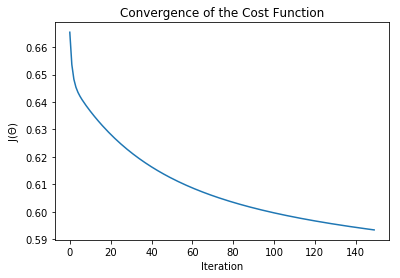

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

theta_init = np.random.normal(0,0.01,size=(5,1))

# Set a learning rate.
learning_rate = 0.1
# Maximum number of iterations for gradient descent.
maxepochs = 10000       
# Costs convergence threshold, ie. (prevcost - cost) > convergence_thres.
convergence_thres = 0.0001  

def learn(X, y, theta, learning_rate, maxepochs, convergence_thres):
    costs = []
    cost = singlecost(X, y, theta) # Compute initial cost.
    costprev = cost + convergence_thres + 0.01 # Set an inital costprev to past while loop.
    counter = 0 # Add a counter.
    # Loop through until convergence.
    for counter in range(maxepochs):
        grads = np.zeros(theta.shape)
        for j, obs in enumerate(X):
            h = sigmoid_activation(obs, theta) # Compute activation.
            delta = (y[j]-h) * h * (1-h) * obs # Get delta.
            grads += delta[:,np.newaxis]/X.shape[0] # Accumulate.
        
        # Update parameters.
        theta += grads * learning_rate
        counter += 1
        costprev = cost # Store prev cost.
        cost = singlecost(X, y, theta) # Compute new cost.
        costs.append(cost)
        if np.abs(costprev-cost) < convergence_thres:
            break
        
    plt.plot(costs)
    plt.title("Convergence of the Cost Function")
    plt.ylabel("J($\Theta$)")
    plt.xlabel("Iteration")
    plt.show()
    return theta
        
theta = learn(X, y, theta_init, learning_rate, maxepochs, convergence_thres)

## Neural Network

In [11]:
theta0_init = np.random.normal(0,0.01,size=(5,4))
theta1_init = np.random.normal(0,0.01,size=(5,1))

def feedforward(X, theta0, theta1):
    # Feedforward to the first layer.
    a1 = sigmoid_activation(X.T, theta0).T
    # Add a column of ones for bias term.
    a1 = np.column_stack([np.ones(a1.shape[0]), a1])
    # Activation units are then inputted to the output layer.
    out = sigmoid_activation(a1.T, theta1)
    return out

h = feedforward(X, theta0_init, theta1_init)
print("h:\n", h)

h:
 [[ 0.49326045  0.49326153  0.49326247  0.49326243  0.49326079  0.49325871
   0.49326272  0.49326066  0.49326359  0.49326102  0.49325889  0.49326121
   0.49326172  0.49326446  0.49325785  0.49325772  0.49325969  0.49326066
   0.49325735  0.49326024  0.49325857  0.49326052  0.49326337  0.49326047
   0.49326048  0.49326064  0.49326084  0.4932598   0.4932601   0.49326173
   0.49326139  0.49325949  0.49325924  0.49325845  0.49326102  0.49326151
   0.49325909  0.49326102  0.49326378  0.49326026  0.49326131  0.493264
   0.49326367  0.49326121  0.49325948  0.49326215  0.49325978  0.49326262
   0.49325929  0.49326096  0.49324748  0.49325059  0.49324766  0.49325551
   0.49325017  0.49325319  0.49325065  0.49325893  0.49324929  0.49325694
   0.49325827  0.49325344  0.49325292  0.49325126  0.49325574  0.49324947
   0.49325391  0.49325319  0.49325197  0.49325481  0.4932525   0.49325282
   0.49325041  0.49325089  0.49325082  0.49324993  0.49324827  0.4932487
   0.49325236  0.49325512  0.49325551

## Multiple Neural Network Cost Function

In [12]:
theta0_init = np.random.normal(0,0.01,size=(5,4))
theta1_init = np.random.normal(0,0.01,size=(5,1))

# X and y are in memory and should be used as inputs to multiplecost().
def multiplecost(X, y, theta0, theta1):
    # Feed through network.
    h = feedforward(X, theta0, theta1) 
    # Compute error.
    inner = y * np.log(h) + (1-y) * np.log(1-h)
    # Negative of average error.
    return -np.mean(inner)

c = multiplecost(X, y, theta0_init, theta1_init)
print("c:", c)

c: 0.691865517108


## Backpropagation

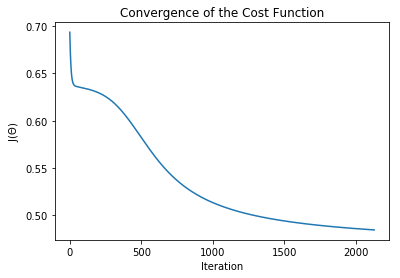

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# Use a class for this model, it's good practice and condenses the code.
class NNet3:
    def __init__(self, learning_rate=0.5, maxepochs=1e4, convergence_thres=1e-5, hidden_layer=4):
        self.learning_rate = learning_rate
        self.maxepochs = int(maxepochs)
        self.convergence_thres = 1e-5
        self.hidden_layer = int(hidden_layer)
        
    def _multiplecost(self, X, y):
        # Feed through network.
        l1, l2 = self._feedforward(X) 
        # Compute error.
        inner = y * np.log(l2) + (1-y) * np.log(1-l2)
        # Negative of average error.
        return -np.mean(inner)
    
    def _feedforward(self, X):
        # Feedforward to the first layer.
        l1 = sigmoid_activation(X.T, self.theta0).T
        # Add a column of ones for bias term.
        l1 = np.column_stack([np.ones(l1.shape[0]), l1])
        # Activation units are then inputted to the output layer.
        l2 = sigmoid_activation(l1.T, self.theta1)
        return l1, l2
    
    def predict(self, X):
        _, y = self._feedforward(X)
        return y
    
    def learn(self, X, y):
        nobs, ncols = X.shape
        self.theta0 = np.random.normal(0,0.01,size=(ncols,self.hidden_layer))
        self.theta1 = np.random.normal(0,0.01,size=(self.hidden_layer+1,1))
        
        self.costs = []
        cost = self._multiplecost(X, y)
        self.costs.append(cost)
        costprev = cost + self.convergence_thres+1 # Set an inital costprev to past while loop.
        counter = 0 # Intialize a counter.

        # Loop through until convergence.
        for counter in range(self.maxepochs):
            # Feedforward through network.
            l1, l2 = self._feedforward(X)

            # Start backpropagation.
            # Compute gradients.
            l2_delta = (y-l2) * l2 * (1-l2)
            l1_delta = l2_delta.T.dot(self.theta1.T) * l1 * (1-l1)

            # Update parameters by averaging gradients and multiplying by the learning rate.
            self.theta1 += l1.T.dot(l2_delta.T) / nobs * self.learning_rate
            self.theta0 += X.T.dot(l1_delta)[:,1:] / nobs * self.learning_rate
            
            # Store costs and check for convergence.
            counter += 1
            costprev = cost # Store prev cost.
            cost = self._multiplecost(X, y) # Get next cost.
            self.costs.append(cost)
            if np.abs(costprev-cost) < self.convergence_thres and counter > 500:
                break

# Set a learning rate.
learning_rate = 0.5
# Maximum number of iterations for gradient descent.
maxepochs = 10000       
# Costs convergence threshold, ie. (prevcost - cost) > convergence_thres.
convergence_thres = 0.00001  
# Number of hidden units.
hidden_units = 4

# Initialize model.
model = NNet3(learning_rate=learning_rate, maxepochs=maxepochs,
              convergence_thres=convergence_thres, hidden_layer=hidden_units)
# Train model.
model.learn(X, y)

# Plot costs.
plt.plot(model.costs)
plt.title("Convergence of the Cost Function")
plt.ylabel("J($\Theta$)")
plt.xlabel("Iteration")
plt.show()

## Splitting Data

In [14]:
# First 70 rows to X_train and y_train.
# Last 30 rows to X_train and y_train.
X_train = X[:70]
y_train = y[:70]

X_test = X[-30:]
y_test = y[-30:]

## Predicting Iris Flowers

In [15]:
from sklearn.metrics import roc_auc_score

# Set a learning rate.
learning_rate = 0.5
# Maximum number of iterations for gradient descent.
maxepochs = 10000       
# Costs convergence threshold, ie. (prevcost - cost) > convergence_thres.
convergence_thres = 0.00001  
# Number of hidden units.
hidden_units = 4

# Initialize model.
model = NNet3(learning_rate=learning_rate, maxepochs=maxepochs,
              convergence_thres=convergence_thres, hidden_layer=hidden_units)
model.learn(X_train, y_train)

yhat = model.predict(X_test)[0]
print("yhat:\n", yhat)

##auc = roc_auc_score(y_test, yhat)
##print(auc)

yhat:
 [ 0.9539593   0.952534    0.95489388  0.95199442  0.95371633  0.95403427
  0.95117543  0.95112127  0.95416692  0.9537129   0.95450752  0.9540777
  0.95423015  0.95203662  0.95392919  0.95451824  0.95376679  0.95329395
  0.9505344   0.95318362  0.95401548  0.95241396  0.95320243  0.95429166
  0.954052    0.95310605  0.95306046  0.95275195  0.95317867  0.95232442]


## Predicting using SKLearn

In [16]:
datatrain = pd.read_csv("C:/Users/i7/csv/iris.csv")

datatrain.set_value(datatrain['species']=='Iris-setosa',['species'],0)
datatrain.set_value(datatrain['species']=='Iris-versicolor',['species'],1)
datatrain.set_value(datatrain['species']=='Iris-virginica',['species'],2)
datatrain = datatrain.apply(pd.to_numeric)

datatrain_array = datatrain.as_matrix()

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(datatrain_array[:,:4],
                                                    datatrain_array[:,4],
                                                    test_size=0.2)

### Build and Train Model

Multilayer perceptron model, with one hidden layer.

input layer : 4 neuron, represents the feature of Iris

hidden layer : 10 neuron, activation using ReLU

output layer : 3 neuron, represents the class of Iris, Softmax Layer

optimizer = stochastic gradient descent with no batch-size

loss function = categorical cross entropy

learning rate = 0.01

epoch = 500


In [21]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10),solver='sgd',learning_rate_init=0.01,max_iter=500)

# Train the model
mlp.fit(X_train, y_train)

# Test the model
mlp.score(X_test,y_test)

sl = 5.8
sw = 4
pl = 1.2
pw = 0.2
data = [sl,sw,pl,pw]
print(mlp.predict(data))

[ 0.]


F:\ANACONDA\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
F:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
